<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Test/Stock_Portfolio(momentum_3month)_ver1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 종목 선택 방법: 모멘텀(3개월)

# 모멘텀 전략
* 최근에 가장 많이 오른 종목 매수한 후 일정 기간을 보유한 후 파는 전략
* 60 영업일 수익률 순위 보여줌
* https://wikidocs.net/84318

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
!pip install -q install finance-datareader

In [3]:
!pip install pykrx

     |████████████████████████████████| 81 kB 4.0 MB/s 
     |████████████████████████████████| 60 kB 4.4 MB/s 
     |████████████████████████████████| 251 kB 9.9 MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from pykrx import stock
import datetime

In [5]:
# 오늘 KOSPI&KOSDAQ 종목 전체 불러오기
today = datetime.datetime.today().strftime("%Y%m%d")
kospi = stock.get_market_fundamental_by_ticker(today, market='KOSPI').index
kosdaq = stock.get_market_fundamental_by_ticker(today, market='KOSDAQ').index
stocks = kospi.append(kosdaq)
stocks

Index(['095570', '006840', '027410', '282330', '138930', '001460', '001465',
       '001040', '079160', '00104K',
       ...
       '065510', '243070', '084110', '263920', '145020', '024060', '010240',
       '189980', '037440', '238490'],
      dtype='object', name='티커', length=2391)

# 종목이름과 종목 코드

In [ ]:
###########추가#############
kospi_temp = fdr.StockListing('KOSPI')[['Symbol', 'Name']]
kosdaq_temp = fdr.StockListing('KOSDAQ')[['Symbol', 'Name']]
code_name_dict = pd.concat([kospi_temp,kosdaq_temp])
code_name_dict = code_name_dict.set_index('Symbol').to_dict().get('Name')
code_name_dict

{'095570': 'AJ네트웍스',
 '006840': 'AK홀딩스',
 '152100': 'ARIRANG 200',
 '295820': 'ARIRANG 200동일가중',
 '253150': 'ARIRANG 200선물레버리지',
 '253160': 'ARIRANG 200선물인버스2X',
 '278420': 'ARIRANG ESG우수기업',
 '292750': 'ARIRANG KRX300',
 '309210': 'ARIRANG KRX300헬스케어',
 '333940': 'ARIRANG KS로우볼가중TR',
 '333950': 'ARIRANG KS로우사이즈가중TR',
 '333960': 'ARIRANG KS모멘텀가중TR',
 '333970': 'ARIRANG KS밸류가중TR',
 '333980': 'ARIRANG KS퀄리티가중TR',
 '269530': 'ARIRANG S&P글로벌인프라',
 '251590': 'ARIRANG 고배당저변동50',
 '161510': 'ARIRANG 고배당주',
 '251600': 'ARIRANG 고배당주채권혼합',
 '289670': 'ARIRANG 국채선물10년',
 '298340': 'ARIRANG 국채선물3년',
 '189400': 'ARIRANG 글로벌MSCI(합성 H)',
 '278620': 'ARIRANG 단기채권액티브',
 '269540': 'ARIRANG 미국S&P500(H)',
 '287180': 'ARIRANG 미국나스닥기술주',
 '213630': 'ARIRANG 미국다우존스고배당주(합성 H)',
 '332610': 'ARIRANG 미국단기우량회사채',
 '332620': 'ARIRANG 미국장기우량회사채',
 '195970': 'ARIRANG 선진국MSCI(합성 H)',
 '238670': 'ARIRANG 스마트베타Quality채권혼합',
 '195980': 'ARIRANG 신흥국MSCI(합성 H)',
 '373530': 'ARIRANG 신흥국MSCI인버스(합성 H)',
 '256450': 'ARIRANG 심

## 3개월 모멘텀

In [ ]:
def momentum_3months(stocks): # 종목 list넣으면, 모멘텀 순위 있는 데이터프레임 출력
    df = pd.DataFrame()
    for s in stocks:
      df[s] = fdr.DataReader( s, '2021-01-01')['Close']
    
    # 60 영업일 수익률
    return_df = df.pct_change(60)
    return_df
    
    # 오늘 날짜
    today = datetime.datetime.today().strftime("%Y-%m-%d")
    
    # index는 종목 코드이고 모멘텀 데이터 있는 데이터 프레임으로 만들기
    s = return_df.loc[today]
    momentum_df = pd.DataFrame(s)
    momentum_df.columns = ["모멘텀"]
    
    momentum_df['순위'] = momentum_df['모멘텀'].rank(ascending=False)
    momentum_df = momentum_df.sort_values(by='순위')
    return momentum_df # 모멘텀

In [ ]:
momentum_3months_rank = momentum_3months(stocks)

In [ ]:
momentum_3months_rank

,모멘텀,순위
136510,4.555556,1.0
065440,2.842900,2.0
007390,2.336735,3.0
102460,2.189873,4.0
291230,1.989933,5.0
...,...,...
303530,NaN,NaN
276730,NaN,NaN
363250,NaN,NaN
365270,NaN,NaN


In [ ]:
momentum_3months_rank.head(30)

,모멘텀,순위
136510,4.555556,1.0
065440,2.842900,2.0
007390,2.336735,3.0
102460,2.189873,4.0
291230,1.989933,5.0
130660,1.828185,6.0
151860,1.799708,7.0
011000,1.762943,8.0
043100,1.712585,9.0
069640,1.668213,10.0


In [ ]:
momentum_3months_rank.tail(30)

,모멘텀,순위
101390,-0.430464,2362.0
004835,-0.436404,2363.0
139670,-0.459510,2364.0
032860,-0.477966,2365.0
156100,-0.495620,2366.0
064510,-0.506726,2367.0
007700,-0.577778,2368.0
221610,-0.631858,2369.0
383220,NaN,NaN
383800,NaN,NaN


In [ ]:
momentum_3months_rank.to_csv("momentum_3months_rank.csv")

## 미리 csv 파일로 저장해 둔 모멘텀 3개월 결과 불러오기

In [6]:
momentum_3months_rank = pd.read_csv('momentum_3months_rank.csv')
momentum_3months_rank

,Unnamed: 0,모멘텀,순위
0,136510,4.555556,1.0
1,065440,2.842900,2.0
2,007390,2.336735,3.0
3,102460,2.189873,4.0
4,291230,1.989933,5.0
...,...,...,...
2386,303530,NaN,NaN
2387,276730,NaN,NaN
2388,363250,NaN,NaN
2389,365270,NaN,NaN


In [7]:
momentum_3months_rank.index = momentum_3months_rank['Unnamed: 0']
momentum_3months_rank

,Unnamed: 0,모멘텀,순위
Unnamed: 0,,,
136510,136510,4.555556,1.0
065440,065440,2.842900,2.0
007390,007390,2.336735,3.0
102460,102460,2.189873,4.0
291230,291230,1.989933,5.0
...,...,...,...
303530,303530,NaN,NaN
276730,276730,NaN,NaN
363250,363250,NaN,NaN


In [8]:
momentum_3months_rank = momentum_3months_rank.drop('Unnamed: 0', axis=1)
momentum_3months_rank

,모멘텀,순위
Unnamed: 0,,
136510,4.555556,1.0
065440,2.842900,2.0
007390,2.336735,3.0
102460,2.189873,4.0
291230,1.989933,5.0
...,...,...
303530,NaN,NaN
276730,NaN,NaN
363250,NaN,NaN


### 모멘텀 3개월 종목 저장

In [9]:
import requests

In [10]:
assets = np.array(momentum_3months_rank.index[:30])
assets

array(['136510', '065440', '007390', '102460', '291230', '130660',
       '151860', '011000', '043100', '069640', '196700', '024740',
       '185490', '003925', '215090', '189860', '049480', '048550',
       '001440', '289220', '006660', '002410', '104620', '016920',
       '189330', '041510', '205500', '090150', '171090', '011700'],
      dtype=object)

In [11]:
len(assets)

30

### 종목코드와 종목이름을 딕셔너리로 저장

In [14]:
###########추가#############
kospi_temp = fdr.StockListing('KOSPI')[['Symbol', 'Name']]
kosdaq_temp = fdr.StockListing('KOSDAQ')[['Symbol', 'Name']]
code_name_dict = pd.concat([kospi_temp,kosdaq_temp])
code_name_dict = code_name_dict.set_index('Symbol').to_dict().get('Name')
code_name_dict

{'095570': 'AJ네트웍스',
 '006840': 'AK홀딩스',
 '152100': 'ARIRANG 200',
 '295820': 'ARIRANG 200동일가중',
 '253150': 'ARIRANG 200선물레버리지',
 '253160': 'ARIRANG 200선물인버스2X',
 '278420': 'ARIRANG ESG우수기업',
 '292750': 'ARIRANG KRX300',
 '309210': 'ARIRANG KRX300헬스케어',
 '333940': 'ARIRANG KS로우볼가중TR',
 '333950': 'ARIRANG KS로우사이즈가중TR',
 '333960': 'ARIRANG KS모멘텀가중TR',
 '333970': 'ARIRANG KS밸류가중TR',
 '333980': 'ARIRANG KS퀄리티가중TR',
 '269530': 'ARIRANG S&P글로벌인프라',
 '251590': 'ARIRANG 고배당저변동50',
 '161510': 'ARIRANG 고배당주',
 '251600': 'ARIRANG 고배당주채권혼합',
 '289670': 'ARIRANG 국채선물10년',
 '298340': 'ARIRANG 국채선물3년',
 '189400': 'ARIRANG 글로벌MSCI(합성 H)',
 '278620': 'ARIRANG 단기채권액티브',
 '269540': 'ARIRANG 미국S&P500(H)',
 '287180': 'ARIRANG 미국나스닥기술주',
 '213630': 'ARIRANG 미국다우존스고배당주(합성 H)',
 '332610': 'ARIRANG 미국단기우량회사채',
 '332620': 'ARIRANG 미국장기우량회사채',
 '195970': 'ARIRANG 선진국MSCI(합성 H)',
 '238670': 'ARIRANG 스마트베타Quality채권혼합',
 '195980': 'ARIRANG 신흥국MSCI(합성 H)',
 '373530': 'ARIRANG 신흥국MSCI인버스(합성 H)',
 '256450': 'ARIRANG 심

### 3년치 주가 데이터 가져오기

In [12]:
# 종목별 종가 가져오기
from datetime import datetime

#시작일
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReader로 각 종목의 종가데이터 불러오기
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

,136510,065440,007390,102460,291230,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,289220,006660,002410,104620,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,8097,20695,NaN,3395,3765,4898,2356,8200,2385,1555,17066,208500,3032,4575,2425,2380,1140,NaN,10750,1735,NaN,1785,30500,40000,6060,1954,9899,2590
2018-07-20,10500,1656,7381,20695,NaN,3380,3750,4840,2646,8250,2350,1550,16648,209000,3052,4400,2425,2325,1130,NaN,10500,1750,NaN,1785,30200,38800,5990,1926,9866,2520
2018-07-23,10450,1585,6273,19616,NaN,3335,3650,4505,2486,8190,2295,1440,15170,209500,2909,4080,2475,2190,1095,NaN,10650,1620,NaN,1800,30000,37600,5870,1860,9665,2250
2018-07-24,10900,1614,6541,19420,NaN,3465,3730,4587,2377,8270,2298,1460,15170,209500,3110,4400,2450,2200,1155,NaN,10600,1665,NaN,1790,30300,38250,5890,1883,9665,2300
2018-07-25,10850,1568,6025,19028,NaN,3465,3650,4447,2369,8280,2298,1400,14373,206000,3039,4250,2350,2160,1135,NaN,10600,1650,NaN,1725,30300,38100,5860,1801,9498,2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,29200,69000,7170.0,15250,22300,46050,1685,12400,6680,4580,41000,399000,1740,11450,6320,3070,2840,76000.0,26300,9500,10213.0,5650,81800,65400,5710,5200,29800,3060
2021-07-14,40100,6340,30800,69500,7370.0,14750,20950,47100,1770,14000,6510,5300,43350,393000,1750,10800,6700,3045,2845,82600.0,26500,8900,10263.0,5800,85000,65400,5950,5290,28850,3035
2021-07-15,37600,6470,30850,66900,7980.0,15500,20950,49800,1830,13100,6950,5400,43300,390000,1710,11100,6650,3020,2815,82600.0,26700,8860,10614.0,5850,84700,64400,7200,5450,28600,3945


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   136510  740 non-null    int64  
 1   065440  740 non-null    int64  
 2   007390  740 non-null    int64  
 3   102460  740 non-null    int64  
 4   291230  701 non-null    float64
 5   130660  740 non-null    int64  
 6   151860  740 non-null    int64  
 7   011000  740 non-null    int64  
 8   043100  740 non-null    int64  
 9   069640  740 non-null    int64  
 10  196700  740 non-null    int64  
 11  024740  740 non-null    int64  
 12  185490  740 non-null    int64  
 13  003925  740 non-null    int64  
 14  215090  740 non-null    int64  
 15  189860  740 non-null    int64  
 16  049480  740 non-null    int64  
 17  048550  740 non-null    int64  
 18  001440  740 non-null    int64  
 19  289220  82 non-null     float64
 20  006660  740 non-null    int64  
 21  002410  740 non-null

In [15]:
df.isnull().sum()

136510      0
065440      0
007390      0
102460      0
291230     39
130660      0
151860      0
011000      0
043100      0
069640      0
196700      0
024740      0
185490      0
003925      0
215090      0
189860      0
049480      0
048550      0
001440      0
289220    658
006660      0
002410      0
104620    130
016920      0
189330      0
041510      0
205500      0
090150      0
171090      0
011700      0
dtype: int64

In [16]:
# 결측값 있는 열 삭제 
df2 = df.dropna(axis = 1)
df2

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,8097,20695,3395,3765,4898,2356,8200,2385,1555,17066,208500,3032,4575,2425,2380,1140,10750,1735,1785,30500,40000,6060,1954,9899,2590
2018-07-20,10500,1656,7381,20695,3380,3750,4840,2646,8250,2350,1550,16648,209000,3052,4400,2425,2325,1130,10500,1750,1785,30200,38800,5990,1926,9866,2520
2018-07-23,10450,1585,6273,19616,3335,3650,4505,2486,8190,2295,1440,15170,209500,2909,4080,2475,2190,1095,10650,1620,1800,30000,37600,5870,1860,9665,2250
2018-07-24,10900,1614,6541,19420,3465,3730,4587,2377,8270,2298,1460,15170,209500,3110,4400,2450,2200,1155,10600,1665,1790,30300,38250,5890,1883,9665,2300
2018-07-25,10850,1568,6025,19028,3465,3650,4447,2369,8280,2298,1400,14373,206000,3039,4250,2350,2160,1135,10600,1650,1725,30300,38100,5860,1801,9498,2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,29200,69000,15250,22300,46050,1685,12400,6680,4580,41000,399000,1740,11450,6320,3070,2840,26300,9500,5650,81800,65400,5710,5200,29800,3060
2021-07-14,40100,6340,30800,69500,14750,20950,47100,1770,14000,6510,5300,43350,393000,1750,10800,6700,3045,2845,26500,8900,5800,85000,65400,5950,5290,28850,3035
2021-07-15,37600,6470,30850,66900,15500,20950,49800,1830,13100,6950,5400,43300,390000,1710,11100,6650,3020,2815,26700,8860,5850,84700,64400,7200,5450,28600,3945


In [17]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 60 kB 3.0 MB/s 
     |████████████████████████████████| 2.7 MB 9.5 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [18]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [19]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df2)

In [20]:
mu

136510    0.549413
065440    0.638104
007390    0.589228
102460    0.469596
130660    0.694829
151860    0.789651
011000    1.232125
043100   -0.115291
069640    0.154612
196700    0.365017
024740    0.498344
185490    0.365521
003925    0.226030
215090   -0.121315
189860    0.361153
049480    0.436163
048550    0.079680
001440    0.351069
006660    0.367212
002410    0.697577
016920    0.472299
189330    0.422897
041510    0.163103
205500    0.037456
090150    0.579063
171090    0.441020
011700    0.183033
dtype: float64

In [21]:
len(mu)

27

In [22]:
S

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700
136510,0.675205,0.106758,0.090744,0.078838,0.072076,0.092655,0.029052,0.038086,0.060459,0.190424,0.035409,0.086125,0.054658,0.100857,0.127165,0.122322,0.102609,0.128246,0.023302,0.085662,0.076935,-0.017147,0.071345,0.059663,0.074828,0.106117,0.064143
065440,0.106758,0.480319,0.108589,0.157315,0.052769,0.108229,0.068350,0.023303,0.100820,0.090799,0.138331,0.163619,0.047990,0.112748,0.095615,0.208405,0.091899,0.086336,0.033877,0.119627,0.104069,-0.024787,0.085759,0.068439,0.092534,0.119450,0.099805
007390,0.090744,0.108589,0.734352,0.151970,0.021664,0.074487,0.106834,0.020454,0.084953,0.048732,0.021738,0.204781,0.039716,0.066202,0.044395,0.096402,0.063757,0.081541,0.032580,0.089750,0.094291,0.057154,0.078426,0.050354,0.051091,0.086537,0.077099
102460,0.078838,0.157315,0.151970,0.459622,0.083718,0.108324,0.115050,0.026385,0.071702,0.097154,0.110383,0.232942,0.078726,0.090653,0.121345,0.136714,0.084710,0.112272,0.039375,0.100330,0.098485,0.015964,0.098290,0.108779,0.110294,0.076611,0.081934
130660,0.072076,0.052769,0.021664,0.083718,0.245324,0.045174,0.020800,0.016768,0.032480,0.065026,-0.000218,0.045509,0.018985,0.065717,0.146094,0.053243,0.041478,0.065574,0.013337,0.056864,0.019598,-0.004740,0.024477,0.059862,0.098871,0.051155,0.051730
151860,0.092655,0.108229,0.074487,0.108324,0.045174,0.349486,0.104861,0.026822,0.084409,0.088815,0.041447,0.102851,0.067232,0.060614,0.066120,0.116515,0.087252,0.074812,0.051384,0.107958,0.058981,-0.000340,0.070356,0.063627,0.055425,0.114379,0.065786
011000,0.029052,0.068350,0.106834,0.115050,0.020800,0.104861,1.096236,0.059471,0.036441,0.067710,0.007920,0.135283,-0.001025,0.033200,0.010746,0.060167,0.002562,0.030084,0.031135,0.057784,0.077694,0.000759,-0.012016,0.059275,0.063753,0.048507,0.038829
043100,0.038086,0.023303,0.020454,0.026385,0.016768,0.026822,0.059471,0.332094,0.022659,0.036678,0.012470,0.078229,-0.006508,0.040772,0.021130,0.037876,0.021409,0.001249,0.036522,0.038774,0.059813,-0.015638,0.013553,0.034468,0.017216,0.038472,0.022555
069640,0.060459,0.100820,0.084953,0.071702,0.032480,0.084409,0.036441,0.022659,0.277197,0.053183,0.054875,0.069713,0.025023,0.046947,0.068514,0.104099,0.044627,0.064677,0.037078,0.059528,0.045760,-0.011677,0.058473,0.038618,0.046946,0.079596,0.045558
196700,0.190424,0.090799,0.048732,0.097154,0.065026,0.088815,0.067710,0.036678,0.053183,0.458854,0.040753,0.111717,0.048683,0.102723,0.120833,0.084061,0.103820,0.141950,0.023421,0.106310,0.084900,-0.014094,0.081707,0.074987,0.089004,0.094448,0.086928


In [23]:
len(S)

27

In [24]:
S.shape

(27, 27)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


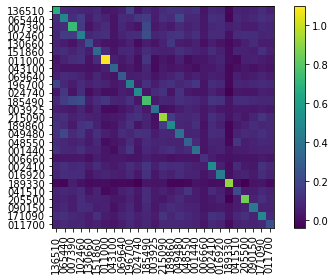

In [25]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S)

# 포트폴리오 최적화 ( Max.샤프비율 )

In [26]:
# Optimize for the maximal Sharpe ratio
# 💛데이터셋이 너무 많으면, ef.max_sharpe()에서 에러남 -> solver를 SCS로 바꿔줌
# Robert says: 100개 이하로 종목을 추린 후에 실행시키기를 추천함 !
ef = EfficientFrontier(mu, S, solver="SCS")  # Create the Efficient Frontier Object

# Maximize the Sharpe ratio, and get the raw weights
# max_sharpe()-> optimizes for maximal Sharpe ratio (a.k.a the tangency portfolio)
# 결과값 : CML(자본시장선)과 효율적 투자선(efficient frontier)의 접점에 있는 포트폴리오
weights = ef.max_sharpe()

# clean_weights()-> rounds the weights and clips near-zeros.
# weights < 0.0001 => clean_weights = 0
# cleaned_weights => 소숫점 5자리까지 표시
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('136510', 0.01722), ('065440', 0.01582), ('007390', 0.02764), ('102460', 0.0), ('130660', 0.2614), ('151860', 0.12917), ('011000', 0.10272), ('043100', 0.0), ('069640', 0.0), ('196700', 0.0), ('024740', 0.08217), ('185490', 0.0), ('003925', 0.0), ('215090', 0.0), ('189860', 0.0), ('049480', 0.0), ('048550', 0.0), ('001440', 0.0), ('006660', 0.18589), ('002410', 0.05103), ('016920', 0.03991), ('189330', 0.05401), ('041510', 0.0), ('205500', 0.0), ('090150', 0.03304), ('171090', 0.0), ('011700', 0.0)])
Expected annual return: 65.2%
Annual volatility: 28.0%
Sharpe Ratio: 2.25


(0.6516489406751891, 0.2802814243729437, 2.253623985565002)

In [27]:
weights

OrderedDict([('136510', 0.0172153151946775),
             ('065440', 0.0158226923315329),
             ('007390', 0.0276378733612286),
             ('102460', 8.1426197e-08),
             ('130660', 0.2613951510784687),
             ('151860', 0.129168063185202),
             ('011000', 0.1027154190238263),
             ('043100', 4.00024892e-08),
             ('069640', 1.641699365e-07),
             ('196700', -1.94298037e-08),
             ('024740', 0.0821701619814938),
             ('185490', 1.0745031e-09),
             ('003925', -1.66668992e-08),
             ('215090', 4.36252141e-08),
             ('189860', -3.98084717e-08),
             ('049480', 1.379845189e-07),
             ('048550', -9.65902299e-08),
             ('001440', -1.14808659e-07),
             ('006660', 0.1858869985026943),
             ('002410', 0.0510340619993748),
             ('016920', 0.039906159615444),
             ('189330', 0.0540115768744901),
             ('041510', 2.696502507e-07),
         

In [28]:
len(weights)

27

In [29]:
cleaned_weights

OrderedDict([('136510', 0.01722),
             ('065440', 0.01582),
             ('007390', 0.02764),
             ('102460', 0.0),
             ('130660', 0.2614),
             ('151860', 0.12917),
             ('011000', 0.10272),
             ('043100', 0.0),
             ('069640', 0.0),
             ('196700', 0.0),
             ('024740', 0.08217),
             ('185490', 0.0),
             ('003925', 0.0),
             ('215090', 0.0),
             ('189860', 0.0),
             ('049480', 0.0),
             ('048550', 0.0),
             ('001440', 0.0),
             ('006660', 0.18589),
             ('002410', 0.05103),
             ('016920', 0.03991),
             ('189330', 0.05401),
             ('041510', 0.0),
             ('205500', 0.0),
             ('090150', 0.03304),
             ('171090', 0.0),
             ('011700', 0.0)])

In [30]:
len(cleaned_weights)

27

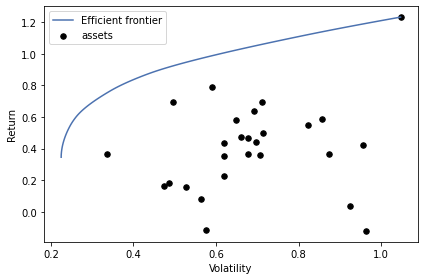

In [31]:
# 효율적 투자선과 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef = EfficientFrontier(mu, S, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


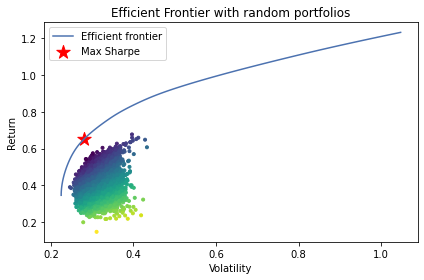

In [32]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Minimize.volatility
# ef.min_volatility()
# ret_minv, std_minv, _ = ef.portfolio_performance()
# ax.scatter(std_minv, ret_minv, marker="*", s=100, c="b", label="Min Volatility")

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets = w.dot(mu)                                     # 기대수익률
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(변동성)
sharpes = rets / stds                                # 샤프비율

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [33]:
# Max.Sharpe Ratio로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef.portfolio_performance(verbose=True)

Expected annual return: 65.2%
Annual volatility: 28.0%
Sharpe Ratio: 2.25


(0.6516489406751891, 0.2802814243729437, 2.253623985565002)

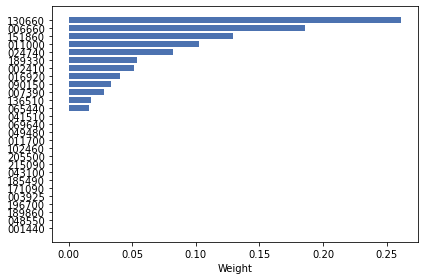

In [34]:
# 종목별 투자비중
plotting.plot_weights(weights, ax=None)

In [35]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 33 kB/s 


In [36]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df2)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)


# print("{}: allocated {:.3f}, desired {:.3f}".format(ticker, allocation_weight, weight)
# print("Allocation has RMSE: {:.3f}".format(rmse))

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')
# print('Allocation has RMSE: {:.3f}'.format(rmse))

# 평균 제곱근 오차(Root Mean Square Error; RMSE)
# 포트폴리오의 종목별 비중과 실제 할당된 비중 간의 차이

rmse = da._allocation_rmse_error(verbose=False)
# print('Allocation has RMSE: {:.5f}'.format(rmse))

Discrete Allocaion:  {'136510': 7, '065440': 35, '007390': 13, '130660': 246, '151860': 94, '011000': 30, '024740': 242, '006660': 104, '002410': 94, '016920': 108, '189330': 9, '090150': 66}
Funds Remaining:  750.0  KRW
Allocation has RMSE: 0.001


In [37]:
allocation

{'002410': 94,
 '006660': 104,
 '007390': 13,
 '011000': 30,
 '016920': 108,
 '024740': 242,
 '065440': 35,
 '090150': 66,
 '130660': 246,
 '136510': 7,
 '151860': 94,
 '189330': 9}

In [38]:
len(allocation)

12

In [40]:
latest_prices

136510     38100
065440      6790
007390     31500
102460     64000
130660     15950
151860     20750
011000     51600
043100      1645
069640     12500
196700      5940
024740      5090
185490     42550
003925    379000
215090      2075
189860     11300
049480      7010
048550      2980
001440      2755
006660     26900
002410      8190
016920      5550
189330     85800
041510     62300
205500      6750
090150      7460
171090     28900
011700      4240
Name: 2021-07-19 00:00:00, dtype: int64

In [41]:
# 각 종목별 매수 주가 (inv_latest_price)
latest_prices.loc['136510']

38100

In [42]:
allocation['136510']

7

In [43]:
# 각 종목별 실제 투자 금액 (invest_price_for_stock)
latest_prices.loc['136510']*allocation['136510']

266700

### 포트폴리오 결과로 보여줄 변수 저장

In [44]:
# 각 종목별 실제 투자 금액
inv_total_price = {}

for i in allocation.keys():
  inv_total_price[i] = latest_prices.loc[i]*allocation[i]
inv_total_price

{'002410': 769860,
 '006660': 2797600,
 '007390': 409500,
 '011000': 1548000,
 '016920': 599400,
 '024740': 1231780,
 '065440': 237650,
 '090150': 492360,
 '130660': 3923700,
 '136510': 266700,
 '151860': 1950500,
 '189330': 772200}

In [45]:
inv_total_price['136510']

266700

In [46]:
# 총 투자금액
investment = 0

for i in inv_total_price.values():
    investment += i
print(investment)

14999250


In [47]:
portfolio_val-leftover

14999250.0

In [48]:
# 각 종목별 실제 투자 비중
inv_total_weight = {}

for i in allocation.keys():
  inv_total_weight[i] = inv_total_price[i]/investment
inv_total_weight

{'002410': 0.05132656632831641,
 '006660': 0.18651599246628997,
 '007390': 0.027301365068253414,
 '011000': 0.1032051602580129,
 '016920': 0.03996199809990499,
 '024740': 0.08212277280530693,
 '065440': 0.015844125539610315,
 '090150': 0.032825641282064104,
 '130660': 0.2615930796539827,
 '136510': 0.017780889044452224,
 '151860': 0.13003983532509958,
 '189330': 0.05148257412870644}

In [49]:
# 투자비중의 합계
investment_w = 0

for i in inv_total_weight.values():
    investment_w += i
print(investment_w)

1.0


In [50]:
# 결과값으로 불러올 값을 리스트로 저장
name_list = []                    # 종목명(회사이름)
total_price_stock =[]             # 각 종목별 실제 투자 금액
total_weight_stock = []           # 각 종목별 실제 투자 비중

for i in allocation.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list.append(code_name_dict.get(i))
    total_price_stock.append(inv_total_price.get(i))
    total_weight_stock.append(inv_total_weight.get(i))

In [51]:
name_list

['쎄미시스코',
 '이루온',
 '네이처셀',
 '한전산업',
 'KG ETS',
 '진원생명과학',
 '한일단조',
 '삼성공조',
 '범양건영',
 '카스',
 '씨이랩',
 '광진윈텍']

In [52]:
total_price_stock

[266700,
 237650,
 409500,
 3923700,
 1950500,
 1548000,
 1231780,
 2797600,
 769860,
 599400,
 772200,
 492360]

In [53]:
total_weight_stock

[0.017780889044452224,
 0.015844125539610315,
 0.027301365068253414,
 0.2615930796539827,
 0.13003983532509958,
 0.1032051602580129,
 0.08212277280530693,
 0.18651599246628997,
 0.05132656632831641,
 0.03996199809990499,
 0.05148257412870644,
 0.032825641282064104]

In [54]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [55]:
discrete_allocation_list

[7, 35, 13, 246, 94, 30, 242, 104, 94, 108, 9, 66]

In [60]:
# Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [61]:
# portfolio_df['Company_name'] = company_name
portfolio_df['종목명'] = name_list
portfolio_df['종목코드'] = allocation
portfolio_df['수량(주)'] = discrete_allocation_list
portfolio_df['투자금액(원)'] = total_price_stock
portfolio_df['투자비중'] = total_weight_stock

In [62]:
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,쎄미시스코,136510,7,266700,0.017781
1,이루온,065440,35,237650,0.015844
2,네이처셀,007390,13,409500,0.027301
3,한전산업,130660,246,3923700,0.261593
4,KG ETS,151860,94,1950500,0.130040
5,진원생명과학,011000,30,1548000,0.103205
6,한일단조,024740,242,1231780,0.082123
7,삼성공조,006660,104,2797600,0.186516
8,범양건영,002410,94,769860,0.051327
9,카스,016920,108,599400,0.039962


In [63]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('투자비중', ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,한전산업,130660,246,3923700,0.261593
1,삼성공조,006660,104,2797600,0.186516
2,KG ETS,151860,94,1950500,0.130040
3,진원생명과학,011000,30,1548000,0.103205
4,한일단조,024740,242,1231780,0.082123
5,씨이랩,189330,9,772200,0.051483
6,범양건영,002410,94,769860,0.051327
7,카스,016920,108,599400,0.039962
8,광진윈텍,090150,66,492360,0.032826
9,네이처셀,007390,13,409500,0.027301


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [64]:
portfolio_df_sorted.loc["합계",2:] = portfolio_df_sorted.sum()
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,한전산업,130660,246.0,3923700.0,0.261593
1,삼성공조,006660,104.0,2797600.0,0.186516
2,KG ETS,151860,94.0,1950500.0,0.130040
3,진원생명과학,011000,30.0,1548000.0,0.103205
4,한일단조,024740,242.0,1231780.0,0.082123
5,씨이랩,189330,9.0,772200.0,0.051483
6,범양건영,002410,94.0,769860.0,0.051327
7,카스,016920,108.0,599400.0,0.039962
8,광진윈텍,090150,66.0,492360.0,0.032826
9,네이처셀,007390,13.0,409500.0,0.027301


In [65]:
print('----- 3 months momentum portfolio performance -----')
# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)

----- 3 months momentum portfolio performance -----
Funds Remaining:  750.0  KRW
Expected annual return: 65.2%
Annual volatility: 28.0%
Sharpe Ratio: 2.25


(0.6516489406751891, 0.2802814243729437, 2.253623985565002)

## 포트폴리오의 수익률과 변동성을 벤치마크지수(KOSPI)와 비교

In [66]:
df2

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,8097,20695,3395,3765,4898,2356,8200,2385,1555,17066,208500,3032,4575,2425,2380,1140,10750,1735,1785,30500,40000,6060,1954,9899,2590
2018-07-20,10500,1656,7381,20695,3380,3750,4840,2646,8250,2350,1550,16648,209000,3052,4400,2425,2325,1130,10500,1750,1785,30200,38800,5990,1926,9866,2520
2018-07-23,10450,1585,6273,19616,3335,3650,4505,2486,8190,2295,1440,15170,209500,2909,4080,2475,2190,1095,10650,1620,1800,30000,37600,5870,1860,9665,2250
2018-07-24,10900,1614,6541,19420,3465,3730,4587,2377,8270,2298,1460,15170,209500,3110,4400,2450,2200,1155,10600,1665,1790,30300,38250,5890,1883,9665,2300
2018-07-25,10850,1568,6025,19028,3465,3650,4447,2369,8280,2298,1400,14373,206000,3039,4250,2350,2160,1135,10600,1650,1725,30300,38100,5860,1801,9498,2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,29200,69000,15250,22300,46050,1685,12400,6680,4580,41000,399000,1740,11450,6320,3070,2840,26300,9500,5650,81800,65400,5710,5200,29800,3060
2021-07-14,40100,6340,30800,69500,14750,20950,47100,1770,14000,6510,5300,43350,393000,1750,10800,6700,3045,2845,26500,8900,5800,85000,65400,5950,5290,28850,3035
2021-07-15,37600,6470,30850,66900,15500,20950,49800,1830,13100,6950,5400,43300,390000,1710,11100,6650,3020,2815,26700,8860,5850,84700,64400,7200,5450,28600,3945


In [67]:
cleaned_weights

OrderedDict([('136510', 0.01722),
             ('065440', 0.01582),
             ('007390', 0.02764),
             ('102460', 0.0),
             ('130660', 0.2614),
             ('151860', 0.12917),
             ('011000', 0.10272),
             ('043100', 0.0),
             ('069640', 0.0),
             ('196700', 0.0),
             ('024740', 0.08217),
             ('185490', 0.0),
             ('003925', 0.0),
             ('215090', 0.0),
             ('189860', 0.0),
             ('049480', 0.0),
             ('048550', 0.0),
             ('001440', 0.0),
             ('006660', 0.18589),
             ('002410', 0.05103),
             ('016920', 0.03991),
             ('189330', 0.05401),
             ('041510', 0.0),
             ('205500', 0.0),
             ('090150', 0.03304),
             ('171090', 0.0),
             ('011700', 0.0)])

In [68]:
len(cleaned_weights)

27

In [ ]:
# # 1씩 더하기
# cleaned_weights_p1 = dict(zip(cleaned_weights.keys(),map(lambda x:x[1]+1,cleaned_weights.items())))
# cleaned_weights_p1

In [69]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights.items():
    df2[i] = df2[i]*weight

In [70]:
df2

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,181.671,25.26454,223.80108,0.0,887.453,486.32505,503.12256,0.0,0.0,0.0,127.77435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998.3175,88.53705,71.23935,1647.305,0.0,0.0,64.56016,0.0,0.0
2018-07-20,180.810,26.19792,204.01084,0.0,883.532,484.38750,497.16480,0.0,0.0,0.0,127.36350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1951.8450,89.30250,71.23935,1631.102,0.0,0.0,63.63504,0.0,0.0
2018-07-23,179.949,25.07470,173.38572,0.0,871.769,471.47050,462.75360,0.0,0.0,0.0,118.32480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1979.7285,82.66860,71.83800,1620.300,0.0,0.0,61.45440,0.0,0.0
2018-07-24,187.698,25.53348,180.79324,0.0,905.751,481.80410,471.17664,0.0,0.0,0.0,119.96820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970.4340,84.96495,71.43890,1636.503,0.0,0.0,62.21432,0.0,0.0
2018-07-25,186.837,24.80576,166.53100,0.0,905.751,471.47050,456.79584,0.0,0.0,0.0,115.03800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970.4340,84.19950,68.84475,1636.503,0.0,0.0,59.50504,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,673.302,95.86920,807.08800,0.0,3986.350,2880.49100,4730.25600,0.0,0.0,0.0,376.33860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4888.9070,484.78500,225.49150,4418.018,0.0,0.0,171.80800,0.0,0.0
2021-07-14,690.522,100.29880,851.31200,0.0,3855.650,2706.11150,4838.11200,0.0,0.0,0.0,435.50100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4926.0850,454.16700,231.47800,4590.850,0.0,0.0,174.78160,0.0,0.0
2021-07-15,647.472,102.35540,852.69400,0.0,4051.700,2706.11150,5115.45600,0.0,0.0,0.0,443.71800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4963.2630,452.12580,233.47350,4574.647,0.0,0.0,180.06800,0.0,0.0


In [71]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df2['Port'] = df2.sum(axis = 1)
df2

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700,Port
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,181.671,25.26454,223.80108,0.0,887.453,486.32505,503.12256,0.0,0.0,0.0,127.77435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998.3175,88.53705,71.23935,1647.305,0.0,0.0,64.56016,0.0,0.0,6305.37064
2018-07-20,180.810,26.19792,204.01084,0.0,883.532,484.38750,497.16480,0.0,0.0,0.0,127.36350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1951.8450,89.30250,71.23935,1631.102,0.0,0.0,63.63504,0.0,0.0,6210.59045
2018-07-23,179.949,25.07470,173.38572,0.0,871.769,471.47050,462.75360,0.0,0.0,0.0,118.32480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1979.7285,82.66860,71.83800,1620.300,0.0,0.0,61.45440,0.0,0.0,6118.71682
2018-07-24,187.698,25.53348,180.79324,0.0,905.751,481.80410,471.17664,0.0,0.0,0.0,119.96820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970.4340,84.96495,71.43890,1636.503,0.0,0.0,62.21432,0.0,0.0,6198.27983
2018-07-25,186.837,24.80576,166.53100,0.0,905.751,471.47050,456.79584,0.0,0.0,0.0,115.03800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970.4340,84.19950,68.84475,1636.503,0.0,0.0,59.50504,0.0,0.0,6146.71539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,673.302,95.86920,807.08800,0.0,3986.350,2880.49100,4730.25600,0.0,0.0,0.0,376.33860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4888.9070,484.78500,225.49150,4418.018,0.0,0.0,171.80800,0.0,0.0,23738.70430
2021-07-14,690.522,100.29880,851.31200,0.0,3855.650,2706.11150,4838.11200,0.0,0.0,0.0,435.50100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4926.0850,454.16700,231.47800,4590.850,0.0,0.0,174.78160,0.0,0.0,23854.86890
2021-07-15,647.472,102.35540,852.69400,0.0,4051.700,2706.11150,5115.45600,0.0,0.0,0.0,443.71800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4963.2630,452.12580,233.47350,4574.647,0.0,0.0,180.06800,0.0,0.0,24323.08420


In [72]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio = df2[['Port']].pct_change()
portfolio

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.015032
2018-07-23,-0.014793
2018-07-24,0.013003
2018-07-25,-0.008319
...,...
2021-07-13,-0.019723
2021-07-14,0.004893
2021-07-15,0.019628


In [73]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [74]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [75]:
# 코스피와 포트폴리오 합치기
result = kospi_pct.join(portfolio)
result

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.015032
2018-07-23,-0.008684,-0.014793
2018-07-24,0.004799,0.013003
2018-07-25,-0.003144,-0.008319
...,...,...
2021-07-13,0.007673,-0.019723
2021-07-14,-0.002008,0.004893
2021-07-15,0.006558,0.019628


In [76]:
# 1열을 0으로 
result.iloc[0] = 0
result

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.015032
2018-07-23,-0.008684,-0.014793
2018-07-24,0.004799,0.013003
2018-07-25,-0.003144,-0.008319
...,...,...
2021-07-13,0.007673,-0.019723
2021-07-14,-0.002008,0.004893
2021-07-15,0.006558,0.019628


In [77]:
# 열 이름 변경
result.columns = ['KOSPI', 'PORTFOLIO']
result

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.015032
2018-07-23,-0.008684,-0.014793
2018-07-24,0.004799,0.013003
2018-07-25,-0.003144,-0.008319
...,...,...
2021-07-13,0.007673,-0.019723
2021-07-14,-0.002008,0.004893
2021-07-15,0.006558,0.019628


In [78]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth = (1+result).cumprod()
wealth

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.984968
2018-07-23,0.994313,0.970398
2018-07-24,0.999084,0.983016
2018-07-25,0.995943,0.974838
...,...,...
2021-07-13,1.433376,3.764839
2021-07-14,1.430497,3.783262
2021-07-15,1.439878,3.857519


### 시각화

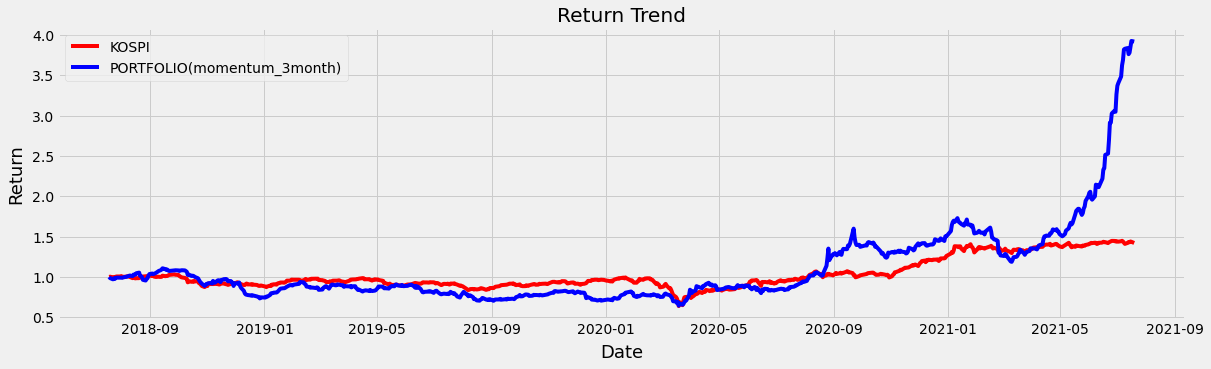

In [83]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO(momentum_3month)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

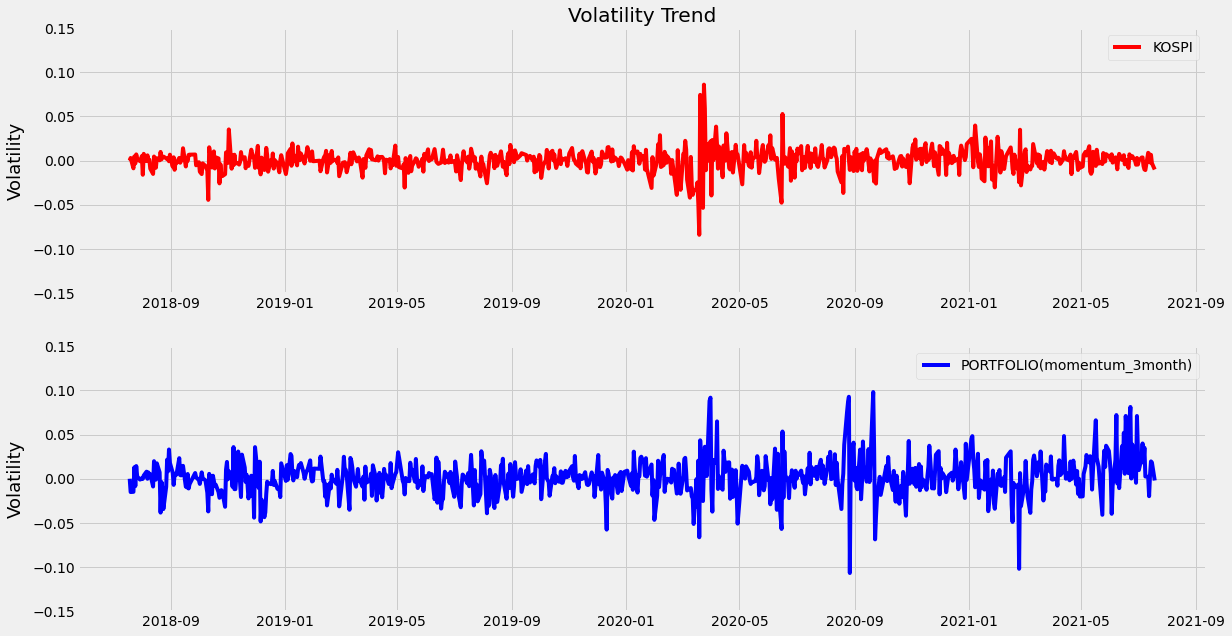

In [85]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')
plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO(momentum_3month)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [81]:
print('----- 3 months momentum portfolio performance -----')
# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)

# Show RMSE
# print('Allocation has RMSE: {:.3f}'.format(rmse))

----- 3 months momentum portfolio performance -----
Funds Remaining:  750.0  KRW
Expected annual return: 65.2%
Annual volatility: 28.0%
Sharpe Ratio: 2.25


(0.6516489406751891, 0.2802814243729437, 2.253623985565002)